In [88]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Choosing alpha

In [18]:
#Analytically defined function to calculate gradient of function at a given point
def gradient(x):
    grad = np.zeros(2)
    grad[0] = -4*(x[1]-x[0])**3 + 8*x[1] -1
    grad[1] = 4*(x[1]-x[0])**3 + 8*x[0] +1
    return grad

In [19]:
#Given function
def func(x):
    out = (x[1]-x[0])**4 + 8*x[0]*x[1] - x[0] + x[1] + 3
    return out

In [20]:
alpha_in = 5
rho = 0.8
c = 0.1

In [30]:
# Function to backtrack value of alpha for given parameters
def backtracking(alpha_in, rho, c, x, iterlim):
    i = 0
    alpha = alpha_in
    while (func(x - alpha*gradient(x)) > func(x) - c*alpha*np.dot(gradient(x),gradient(x))) and (i<iterlim):
        alpha = alpha*rho
        i = i+1
    return alpha

# Steepest Descent 

In [31]:
#Function to calculate eucledian norm of a two dimensinal vector
def norm(x):
    ans = (x[0]**2+x[1]**2)**0.5
    return ans

In [59]:
'''Function that calculates steepest descent with in-exact line-search approach and outputs dictionary with iteration count
to corresponding value of x and gradient at x'''
def steepest_descent(itermax, toler, xguess, alpha_in, rho, c, iterlim):
    i = 1
    x = xguess
    X = {0:[xguess, func(xguess)]}
    while (i<itermax) and (norm(gradient(x))>toler):
        step_len = backtracking(alpha_in, rho, c, x, iterlim)
        x = x - gradient(x)*step_len
        X[i] = [x,func(x)]
        i = i+1
    print('Converged value of x is', x)
    print('Corresponding value of f(x) is ', func(x))
    print('Corresponding value of grad(x) is ', gradient(x))
    if i==iterlim:
        print('Maximum iterations reached but convergence did not happen')
    return X

In [60]:
itermax = 15000
iterlim = itermax
toler = 10**(-6)
xguess = np.array([1.5,1.5])
alpha_in = 5
rho = 0.8
c = 0.1

In [61]:
X = steepest_descent(itermax, toler, xguess, alpha_in, rho, c, iterlim)

Converged value of x is [-0.41878265  0.41878265]
Corresponding value of f(x) is  2.9266582180811924
Corresponding value of grad(x) is  [ 6.09051038e-07 -6.15154818e-07]


# Plotting

In [62]:
x = np.array(list(X.keys()))
x1_val = []
x2_val = []
fx_val = []
for i in x:
    x1_val.append(X[i][0][0])
    x2_val.append(X[i][0][1])
    fx_val.append(X[i][1])

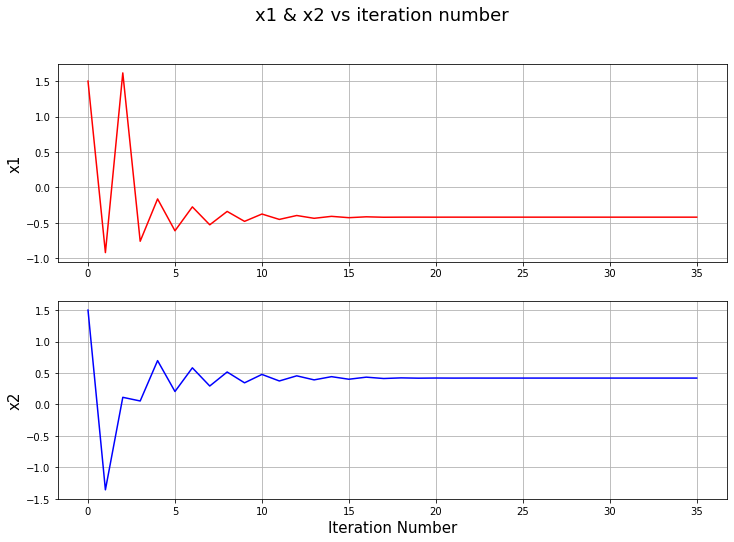

In [101]:
fig, axs = plt.subplots(2)
fig.set_size_inches(12,8)

fig.suptitle('x1 & x2 vs iteration number', fontsize = 18)
#subplot 1
axs[0].plot(x, x1_val,'r')
axs[0].grid()
axs[0].set_ylabel('x1', fontsize = 15)

#subplot 2
axs[1].plot(x, x2_val, 'b')
axs[1].grid()
axs[1].set_ylabel('x2', fontsize = 15)

plt.xlabel('Iteration Number', fontsize = 15)
plt.show()

Text(0.5, 1.0, 'f(x) vs Iteration Number')

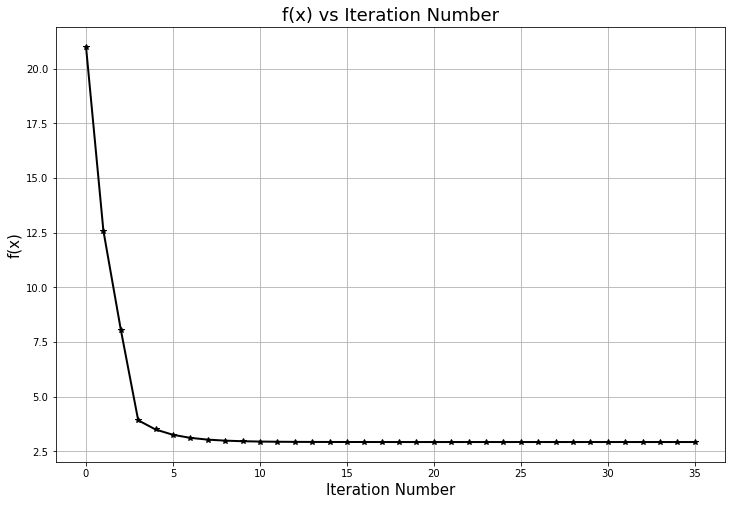

In [102]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 8)
plt.plot(x,fx_val, color = 'k', marker='*', linewidth = 2)
plt.grid()
plt.xlabel('Iteration Number', fontsize = 15)
plt.ylabel('f(x)', fontsize = 15)
plt.title('f(x) vs Iteration Number', fontsize = 18)